# CMAP LINCS 2020

https://github.com/cmap/lincs-workshop-2020/blob/main/notebooks/data_access/cmapBQ_Tutorial.ipynb


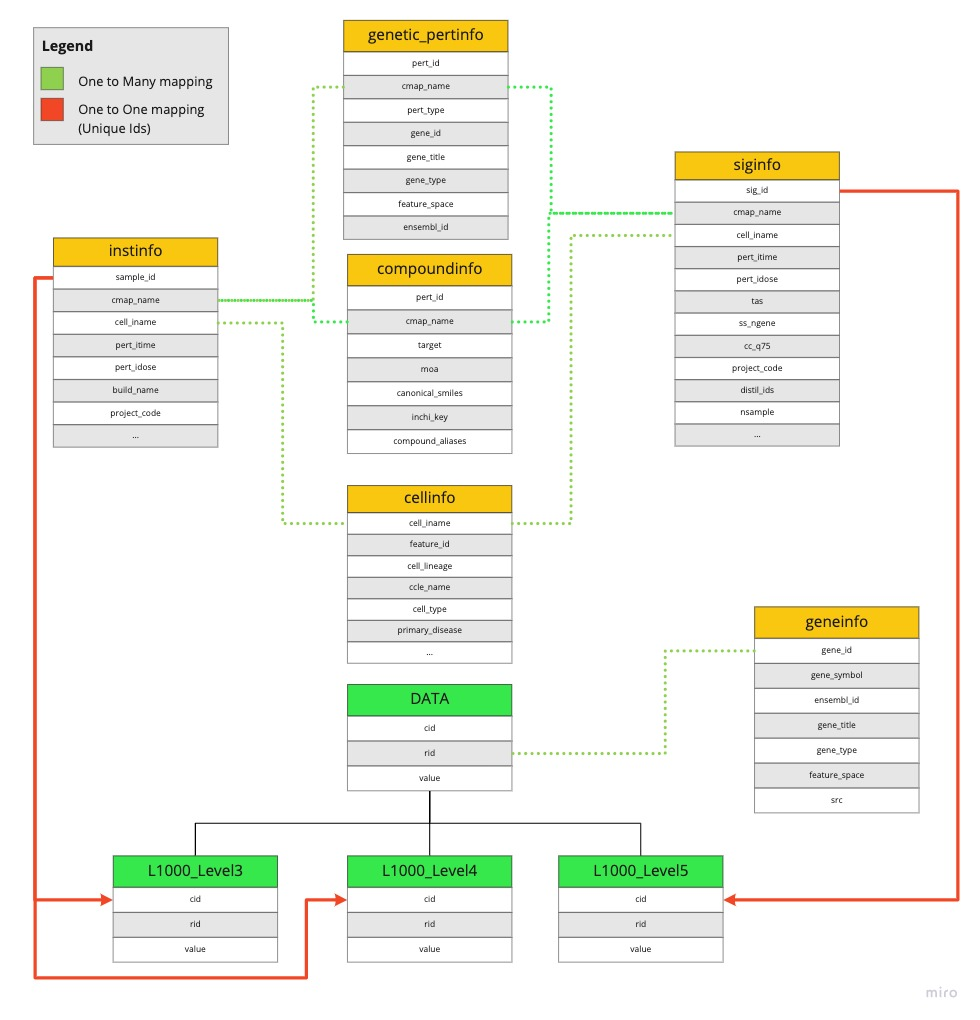

## 1) Setting up code

In [15]:
#!pip install --upgrade google-cloud-bigquery
!pip -q install cmapBQ

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 5.4 MB/s eta 0:00:00


In [3]:
from google.colab import auth
from google.cloud import bigquery

In [4]:
auth.authenticate_user()

In [7]:
project_id = "cmap-big-table"  # Reemplázalo con tu ID de proyecto
client = bigquery.Client(project=project_id)


In [8]:
# Listar datasets para confirmar conexión
datasets = list(client.list_datasets())
for dataset in datasets:
    print(f"Dataset encontrado: {dataset.dataset_id}")

Dataset encontrado: cmap_lincs_public_views


## 2) Use CLINCS 2020 Dataset

In [11]:
# Define the SQL query
query = """
SELECT
  L5.sig_id,
  L5.gene_id,
  L5.z_score,
  SI.pert_id,
  SI.cell_id,
  SI.pert_type,
  SI.pert_time,
  SI.pert_dose
FROM
  `cmap-big-table.cmap_lincs_public_views.L1000_Level5` AS L5
JOIN
  `cmap-big-table.cmap_lincs_public_views.siginfo` AS SI
ON
  L5.sig_id = SI.sig_id
"""

In [10]:
# List all tables in the dataset
dataset_id = "cmap-big-table.cmap_lincs_public_views"

tables = list(client.list_tables(dataset_id))
print("Tables in the dataset:")
for table in tables:
    print(table.table_id)


Tables in the dataset:
L1000_Level3
L1000_Level3_cid
L1000_Level3_landmark
L1000_Level3_rid
L1000_Level4
L1000_Level4_cid
L1000_Level4_landmark
L1000_Level4_rid
L1000_Level5
L1000_Level5_cid
L1000_Level5_landmark
L1000_Level5_rid
cellinfo
compoundinfo
geneinfo
genetic_pertinfo
instinfo
siginfo


In [14]:
datasets = list(client.list_datasets())
if datasets:
    print("Datasets in project:")
    for dataset in datasets:
        print(dataset.dataset_id)
else:
    print("No access to datasets.")


Datasets in project:
cmap_lincs_public_views


In [13]:
# Run the query and convert it into a Pandas DataFrame
query_job = client.query(query)

Forbidden: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/cmap-big-table/jobs?prettyPrint=false: Access Denied: Project cmap-big-table: User does not have bigquery.jobs.create permission in project cmap-big-table.

Location: None
Job ID: 09025bf4-fed3-4a97-8cda-d9b1664787b7


## con el jupyter[texto del enlace]

https://github.com/cmap/lincs-workshop-2020/blob/main/notebooks/data_access/cmapBQ_Tutorial.ipynb continuar mañana


In [ ]:
df = query_job.to_dataframe()

In [ ]:
mport os
import pandas as pd
import numpy as np
import seaborn as sns
import requests

import matplotlib.pyplot as plt

In [16]:

import requests

# URL with credentials
url = ('https://s3.amazonaws.com/data.clue.io/api/bq_creds/BQ-demo-credentials.json')

response = requests.get(url)
credentials_filepath='/content/BQ-demo-credentials.json'

with open(credentials_filepath, 'w') as f:
  f.write(response.text)


In [17]:
import cmapBQ.query as cmap_query
import cmapBQ.config as cmap_config

credentials_filepath='/content/BQ-demo-credentials.json'
# Set up credentials
cmap_config.setup_credentials(credentials_filepath)
bq_client = cmap_config.get_bq_client()

In [18]:
import cmapBQ.query as cmap_query

cmap_query.list_tables()

_includes_clustered_tables: <bound method TableDirectory._includes_clustered_tables of TableDirectory(compoundinfo='cmap-big-table.cmap_lincs_public_views.compoundinfo', genetic_pertinfo='cmap-big-table.cmap_lincs_public_views.genetic_pertinfo', geneinfo='cmap-big-table.cmap_lincs_public_views.geneinfo', cellinfo='cmap-big-table.cmap_lincs_public_views.cellinfo', instinfo='cmap-big-table.cmap_lincs_public_views.instinfo', siginfo='cmap-big-table.cmap_lincs_public_views.siginfo', level3='cmap-big-table.cmap_lincs_public_views.L1000_Level3_cid', level3_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level3_rid', level3_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level3_landmark', level4='cmap-big-table.cmap_lincs_public_views.L1000_Level4_cid', level4_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level4_rid', level4_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level4_landmark', level5='cmap-big-table.cmap_lincs_public_views.L1000_Level5_cid', level5_rid='cmap-b